# Introduction

The objectives of this lab are
- Introduction to the MNIST dataset,
- Manipulation of the Python library scikit-learn for machine learning,
- First examples of supervised classification with the k-nearest neighbors method (k-NN) [Lecture 1],
- Evaluation of the classification error,
- Selection of models.

Scikit-learn is a Python software requiring the installation of the libraries NumPy and SciPy (for scientific computation), in compatible versions.
- From scratch, the easiest is to install a complete Python distribution, e.g. Anaconda3 with a new environment, which includes most of the usual Python libraries. The official website of scikit-learn is: http://scikit-learn.org/stable/index.html.
- On the machines at INSA, the Python environment should already include most libraries. In the case of a missing library, you can add it with pip: e.g. **pip install numpy**. We advice to use an IDE, e.g. Visual Studio, to edit the jupyter-notebook.
- Alternatively, you can directly run your code on Google Colab, which allows to access your work from anywhere. Beware, the computation and memory resources are limited.

# 1. The dataset

### scikit-learn datasets
Some datasets are natively available in scikit-learn: https://scikit-learn.org/stable/datasets/real_world.html. It is also possible to generate artificial data or get external data (see unsupervised learning lab).

The datasets include a certain number of attributes (all attributes are not included in all datasets): in particular .data, .target, .target_names, .feature_names, .DESCR:
- .data: table of dimensions n x m where n is the number of samples, and m the number of features.
- .target: the classes (labels) of each instance (in the case of supervised learning).
- .target_names: names of the classes.
- .feature_names: names of the features.
- .DESCR: complete description of the dataset in textual format.

### MNIST
MNIST was developed by the pionners of deep learning, Y. LeCun et Y. Bengio, in 1998. The MNIST database, for Modified or Mixed National Institute of Standards and
Technology, is a database of manually written numbers from 0 to 9. By definition, it is a multi-class classification problem with 10 classes. An input sample is an image of fixed size 28 x 28. For example:

<img src="https://collonvillethomas.files.wordpress.com/2021/04/image-6.png?w=569" alt="MNIST example" />

Thus an example is a vector with 28*28=784 components corresponding to the grayscale of each of the 784 pixels.

## Exercice 1: Manipulation of the database

0. Importing the dataset

In [1]:
# Option 1:
import numpy as np
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784',parser='auto')

# ## Option 2:
# from sklearn.datasets import fetch_mldata
# mnist = fetch_mldata('MNIST original')

# ## Option 3:
# ## Directly fetch mnist.mat on the internet, for example: https://github.com/daniel-e/mnist_octave/raw/master/mnist.mat

1. Execute the following commands and understand what they do (you will have to use them again).

In [2]:
print(mnist)  # Display information about the MNIST dataset

print(mnist.data)  # Display the data of the MNIST dataset

print(mnist.target)  # Display the target labels of the MNIST dataset

len(mnist.data)  # Display the length of the data in the MNIST dataset
print(mnist.data.shape)  # Display the shape of the data in the MNIST dataset

print(mnist.target.shape)  # Display the shape of the target labels in the MNIST dataset

X = np.asarray(mnist.data)  # Convert data to a numpy array
print(X[0])  # Display all pixels of the first image in the dataset (i.e., the first image)

print(X[0][1])  # Display the value of the first pixel of the first image

print(X[:, 1])  # Display a list of the first pixels of all 70,000 images

print(X[:100])  # Display a list of the first pixels of the first 100 images

y = np.asarray(mnist.target)  # Convert target labels to a numpy array
print(y[0])  # Display the class label of the first image


{'data':        pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  pixel9  \
0           0       0       0       0       0       0       0       0       0   
1           0       0       0       0       0       0       0       0       0   
2           0       0       0       0       0       0       0       0       0   
3           0       0       0       0       0       0       0       0       0   
4           0       0       0       0       0       0       0       0       0   
...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
69995       0       0       0       0       0       0       0       0       0   
69996       0       0       0       0       0       0       0       0       0   
69997       0       0       0       0       0       0       0       0       0   
69998       0       0       0       0       0       0       0       0       0   
69999       0       0       0       0       0       0       0       0       0   

       pixel10  ..

2. Visualise the data

scikit-learn includes the library matplotlib which propose numerous primitives to generate curves and graphics. The database MNIST contains written numbers as images with a fixed size 28 x 28. Execute the following commands and understand them.

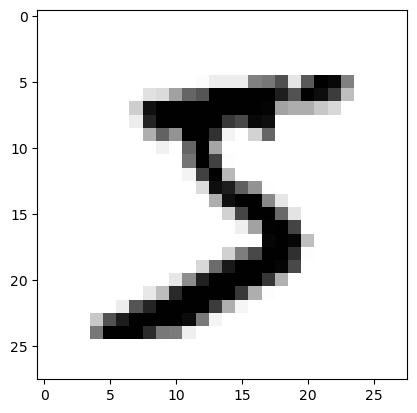

In [3]:
from sklearn import datasets
import matplotlib.pyplot as plt
images = X.reshape((-1, 28, 28))
plt.imshow(images[0],cmap=plt.cm.gray_r,interpolation="nearest")
plt.show()

Affichez la classe correspondante à l’image affichée.

In [4]:
print("first image's class is class n", y[0]) 


first image's class is class n 5


3. Explore other datasets

scikit-learn includes the library matplotlib which propose numerous primitives to generate curves and graphics. The database MNIST contains written numbers as images with a fixed size 28 x 28. Execute the following commands and understand them.

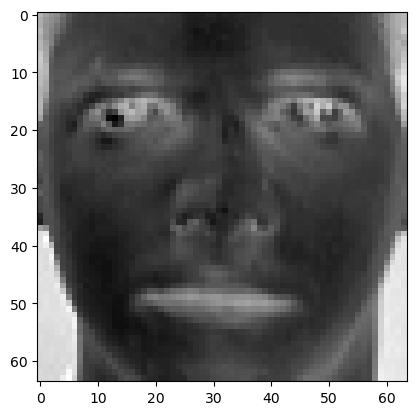

0


In [5]:
import numpy as np
from sklearn.datasets import fetch_olivetti_faces
olivetti = fetch_olivetti_faces()

X_olivetti=np.asarray(olivetti.data)
images_olivetti = X_olivetti.reshape((-1, 64, 64))
plt.imshow(images_olivetti[0],cmap=plt.cm.gray_r,interpolation="nearest")
plt.show()
print(olivetti.target[0])

# 2. The k-Nearest Neighbors (k-NN) method

The k-NN method is a very intuitive algorithm, which can be parametrized and often has a good performance on clasification problems.

The k-NN method requires:
- an integer k
- a training dataset
- a proximity/similarity/distance measure

The principle of the algorithm is the following:
For a new unlabelled example x, find the k labelled samples from the training dataset which are the closest with respect to the chosen measure (the neighbors). The class associated to x is then the one appearing most often among the neighbors (majority/consensus).

In the following example, we have 3 classes (ω1, ω2, ω3) and the goal is to find the value of the class for an unknown example x. We consider the Euclidian distance as proximity measure and k=5 neighbors.

<img src="https://miro.medium.com/v2/resize:fit:488/1*9h-WczF6csbeut5vsvjSUA.gif" alt="k-NN example" />

Among the 5 nearest neighbors, 4 belong to ω1 and 1 belongs to ω3, so x is affected to ω1, the class of the majority.

### Information:
We use the library sklearn.neighbors to execute an example of this classification algorithm.

The command **train_test_split**, implemented in **model_selection** in **sklearn** allows to divide the dataset in two: one training set and one test set:
xtrain, xtest, ytrain, ytest = train_test_split(data, target, train_size=pourcentage_de_données)

Exemple percentage of data = 0.7 (70%)

The algorithm k-NN is implemented in a package called **neighbors**.
Here are the main commands:
- The line **clf = neighbors.KNeighborsClassifier(n_neighbors)** creates an object of type classifier based on the n_neighbors closest neighbors,
- The instruction clf.fit(X, y) uses the data to define the classifier (training),
- The command **clf.predict()** is used to classify the new examples,
- The command **clf.predict_proba()** allows to estimate the probability of the proposed classification,
- The command **clf.score(xtest, ytest)** computes the global score of the classifier for a given dataset.

## Exercice 2: The method of the k-NN

- Import the dataset

In [6]:
import numpy as np
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784',parser='auto')

x_complete = np.asarray(mnist.data)
y_complete = np.asarray(mnist.target)

- Extract a data sample named X with a size of 5000 examples using the function **np.random.randint(70000, size=5000)**, with the corresponding labels y.

In [7]:
# TODO


# Generate random indices using np.random.randint for creating a reduced dataset
random_indices = np.random.randint(70000, size=5000)

# Extract a reduced dataset (x_reduced_ds) by selecting samples from x_complete based on random indices
x_reduced_ds = np.asarray(x_complete[random_indices])

# Extract corresponding labels (y_reduced_ds) for the reduced dataset by selecting from y_complete
y_reduced_ds = np.asarray(y_complete[random_indices])


- Divide the database in 80% for training and 20% for test.

In [8]:
# Import necessary library for splitting the dataset
from sklearn.model_selection import train_test_split

# Split the reduced dataset into training and testing sets
# xtrain: Training data, xtest: Testing data, ytrain: Training labels, ytest: Testing labels
# The parameter 'train_size=0.8' specifies that 80% of the data will be used for training
xtrain, xtest, ytrain, ytest = train_test_split(x_reduced_ds, y_reduced_ds, train_size=0.8)


- Train a k-NN classifier with k = 10 on the training set.

In [9]:
from sklearn import neighbors

# Create a k-nearest neighbors classifier with 10 neighbors
clf = neighbors.KNeighborsClassifier(10)

# Train the classifier using the training data and labels
clf.fit(xtrain, ytrain)

KNeighborsClassifier(n_neighbors=10)

- Display image 4, the class of image 4 and its predicted class

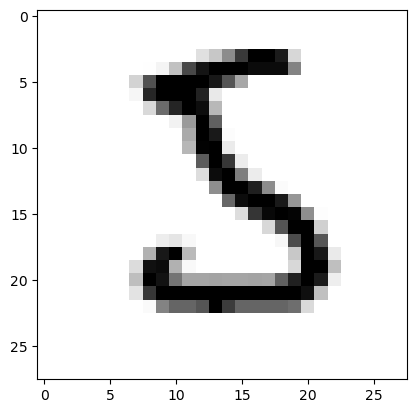

Class predicted: 3 True class: 5


In [10]:
# Import necessary libraries for loading datasets, plotting, and displaying images
from sklearn import datasets
import matplotlib.pyplot as plt

# Specify the index of the sample to be displayed
sample_displayed = 4

# Reshape the testing data for display (assuming each sample is a 28x28 image)
xtest_sh = xtest.reshape((-1, 28, 28))

# Display the specified sample using matplotlib
plt.imshow(xtest_sh[sample_displayed], cmap=plt.cm.gray_r, interpolation="nearest")
plt.show()

# Predict the classes for all testing samples using the trained classifier
y_test_predicted = clf.predict(xtest[:])

# Print the predicted class and the true class for the specified sample
print("Class predicted:", y_test_predicted[sample_displayed], "True class:", ytest[sample_displayed])

- Display the score on the test set

In [11]:
# Calculate the accuracy score of the classifier on the testing set
score = clf.score(xtest, ytest)

# Print the accuracy score of the classifier on the testing set
print("The score on the test set is", score)

The score on the test set is 0.909


- What is the error rate for the training set ? Is it normal ? Underfitting/Overfitting ?

In [12]:
# Calculate the accuracy score of the classifier on the training set
score = clf.score(xtrain, ytrain)

# Print the error rate on the training set (1 - accuracy)
print("Error rate on the training set is", 1 - score)

# The error rate is low on the training set, it suggests a normal model

Error rate on the training set is 0.0645


- Vary the percentage of samples (training and test) and display the score. What is the remarkable percentage ?

In [13]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn import neighbors

# Initialize variables to track the best testing accuracy and corresponding percentage
best_test_accuracy = 0
best_test_percent = 0

# Loop through different test percentages from 850 to 1000 with a step of 5
for test_percent in range(850, 1000, 5):
    # Randomly choose a sample of 5000 examples
    sample_chosen = np.random.randint(70000, size=5000)

    # Extract a reduced dataset based on the chosen sample
    x_reduced_ds = x_complete[sample_chosen]
    y_reduced_ds = y_complete[sample_chosen]

    # Split the reduced dataset into training and testing sets based on the test percentage
    xtrain, xtest, ytrain, ytest = train_test_split(x_reduced_ds, y_reduced_ds, train_size=test_percent / 1000)

    # Create a k-nearest neighbors classifier with 10 neighbors
    clf = neighbors.KNeighborsClassifier(10)

    # Train the classifier using the training data
    clf.fit(xtrain, ytrain)

    # Calculate testing accuracy
    test_accuracy = clf.score(xtest, ytest)

    # Print the test percentage and testing accuracy
    print(test_percent / 1000, " | Testing Accuracy: ", format(test_accuracy, '.3g'))

    # Update the best testing accuracy and corresponding percentage
    if test_accuracy > best_test_accuracy:
        best_test_accuracy = test_accuracy
        best_test_percent = test_percent / 1000

# Print the remarkable percentage and corresponding testing accuracy
print("Remarkable Percentage: ", best_test_percent, " | Best Testing Accuracy: ", format(best_test_accuracy, '.3g'))


0.85  | Testing Accuracy:  0.913
0.855  | Testing Accuracy:  0.927
0.86  | Testing Accuracy:  0.914
0.865  | Testing Accuracy:  0.921
0.87  | Testing Accuracy:  0.915
0.875  | Testing Accuracy:  0.904
0.88  | Testing Accuracy:  0.922
0.885  | Testing Accuracy:  0.906
0.89  | Testing Accuracy:  0.922
0.895  | Testing Accuracy:  0.93
0.9  | Testing Accuracy:  0.92
0.905  | Testing Accuracy:  0.92
0.91  | Testing Accuracy:  0.947
0.915  | Testing Accuracy:  0.911
0.92  | Testing Accuracy:  0.92
0.925  | Testing Accuracy:  0.923
0.93  | Testing Accuracy:  0.943
0.935  | Testing Accuracy:  0.92
0.94  | Testing Accuracy:  0.93
0.945  | Testing Accuracy:  0.931
0.95  | Testing Accuracy:  0.928
0.955  | Testing Accuracy:  0.92
0.96  | Testing Accuracy:  0.9
0.965  | Testing Accuracy:  0.909
0.97  | Testing Accuracy:  0.913
0.975  | Testing Accuracy:  0.928
0.98  | Testing Accuracy:  0.91
0.985  | Testing Accuracy:  0.92
0.99  | Testing Accuracy:  0.96
0.995  | Testing Accuracy:  0.96
Remarkabl

- Vary the number of neighbors (k) from 2 to 15 and display the scores as a curve (one curve for training and one for test). What is the optimal k ? Implement two approaches:
    - use a loop on k using the training and test datasets,
    - use a K-fold validation as implemented with the functions **kf = KFold(len(X), n_folds=10, shuffle=True, random_state=42)** and **kf.split(X)** from sklearn.model_selection. Let's remind that the score for a particular model (one choice of k) is obtained as the average score over all folds.

currently on loop version working with 2 neighbors
currently on loop version working with 3 neighbors
currently on loop version working with 4 neighbors
currently on loop version working with 5 neighbors
currently on loop version working with 6 neighbors
currently on loop version working with 7 neighbors
currently on loop version working with 8 neighbors
currently on loop version working with 9 neighbors
currently on loop version working with 10 neighbors
currently on loop version working with 11 neighbors
currently on loop version working with 12 neighbors
currently on loop version working with 13 neighbors
currently on loop version working with 14 neighbors
currently on loop version working with 15 neighbors
currently on k-fold version working with 2 neighbors
currently on k-fold version working with 3 neighbors
currently on k-fold version working with 4 neighbors
currently on k-fold version working with 5 neighbors
currently on k-fold version working with 6 neighbors
currently on k-

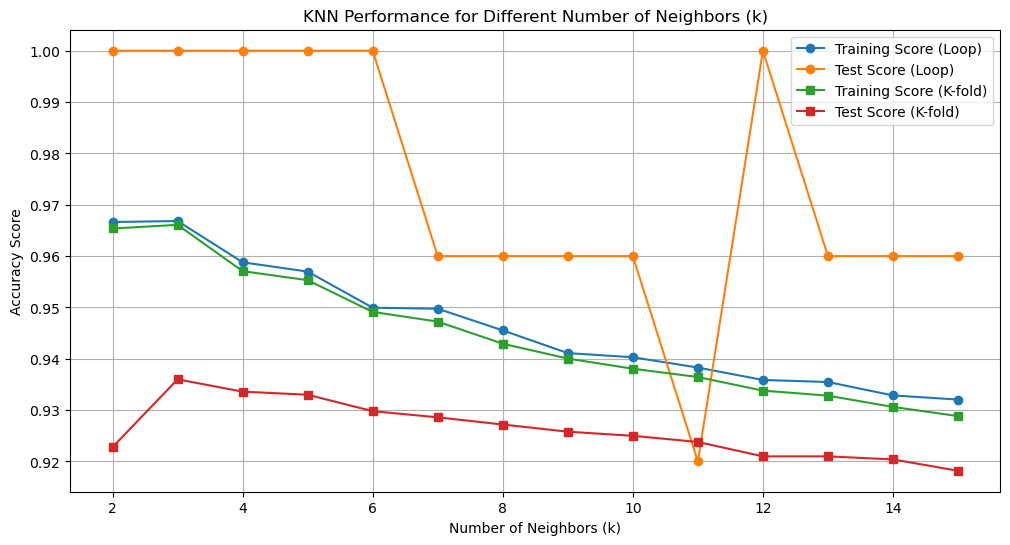

In [14]:
from sklearn.model_selection import train_test_split, KFold
from sklearn import neighbors
import numpy as np

# Use a loop on k using the training and test datasets
vec_nb_voisin = np.arange(2, 16)
scores_test_loop = np.zeros(len(vec_nb_voisin))
scores_train_loop = np.zeros(len(vec_nb_voisin))

for i, nb_voisin in enumerate(vec_nb_voisin):
    print("currently on loop version working with",nb_voisin,"neighbors")

    # Create a k-nearest neighbors classifier
    knn_loop = neighbors.KNeighborsClassifier(n_neighbors=nb_voisin)

    # Train the model
    knn_loop.fit(xtrain, ytrain)

    # Evaluate the model on the test set
    scores_test_loop[i] = knn_loop.score(xtest, ytest)

    # Evaluate the model on the training set
    scores_train_loop[i] = knn_loop.score(xtrain, ytrain)

# Use K-fold validation
kf = KFold(n_splits=10, shuffle=True, random_state=42)
scores_test_kfold = np.zeros(len(vec_nb_voisin))
scores_train_kfold = np.zeros(len(vec_nb_voisin))

for i, nb_voisin in enumerate(vec_nb_voisin):
    print("currently on k-fold version working with",nb_voisin,"neighbors")
    
    # Initialize scores for each iteration of k-fold
    scores_test_kfold_iter = []
    scores_train_kfold_iter = []

    # Iterate through the folds
    for train_index, test_index in kf.split(x_reduced_ds, y_reduced_ds):
        X_train, X_test = x_reduced_ds[train_index], x_reduced_ds[test_index]
        y_train, y_test = y_reduced_ds[train_index], y_reduced_ds[test_index]

        # Create a k-nearest neighbors classifier
        knn_kfold = neighbors.KNeighborsClassifier(n_neighbors=nb_voisin)

        # Train the model
        knn_kfold.fit(X_train, y_train)

        # Evaluate the model on the test set
        score_test_kfold = knn_kfold.score(X_test, y_test)
        scores_test_kfold_iter.append(score_test_kfold)

        # Evaluate the model on the training set
        score_train_kfold = knn_kfold.score(X_train, y_train)
        scores_train_kfold_iter.append(score_train_kfold)

    # Average scores over all folds
    scores_test_kfold[i] = np.mean(scores_test_kfold_iter)
    scores_train_kfold[i] = np.mean(scores_train_kfold_iter)

# Plot the results
plt.figure(figsize=(12, 6))

# Results from the loop approach
plt.plot(vec_nb_voisin, scores_train_loop, label='Training Score (Loop)', marker='o')
plt.plot(vec_nb_voisin, scores_test_loop, label='Test Score (Loop)', marker='o')

# Results from the K-fold approach
plt.plot(vec_nb_voisin, scores_train_kfold, label='Training Score (K-fold)', marker='s')
plt.plot(vec_nb_voisin, scores_test_kfold, label='Test Score (K-fold)', marker='s')

plt.title('KNN Performance for Different Number of Neighbors (k)')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy Score')
plt.legend()
plt.grid(True)
plt.show()


- Still using K-fold, vary the type of distance used. What is the best distance in our case ?

currently using euclidean metric with 2 neighbors
currently using euclidean metric with 3 neighbors
currently using euclidean metric with 4 neighbors
currently using euclidean metric with 5 neighbors
currently using euclidean metric with 6 neighbors
currently using euclidean metric with 7 neighbors
currently using euclidean metric with 8 neighbors
currently using euclidean metric with 9 neighbors
currently using euclidean metric with 10 neighbors
currently using euclidean metric with 11 neighbors
currently using euclidean metric with 12 neighbors
currently using euclidean metric with 13 neighbors
currently using euclidean metric with 14 neighbors
currently using euclidean metric with 15 neighbors
currently using manhattan metric with 2 neighbors
currently using manhattan metric with 3 neighbors
currently using manhattan metric with 4 neighbors
currently using manhattan metric with 5 neighbors
currently using manhattan metric with 6 neighbors
currently using manhattan metric with 7 neig

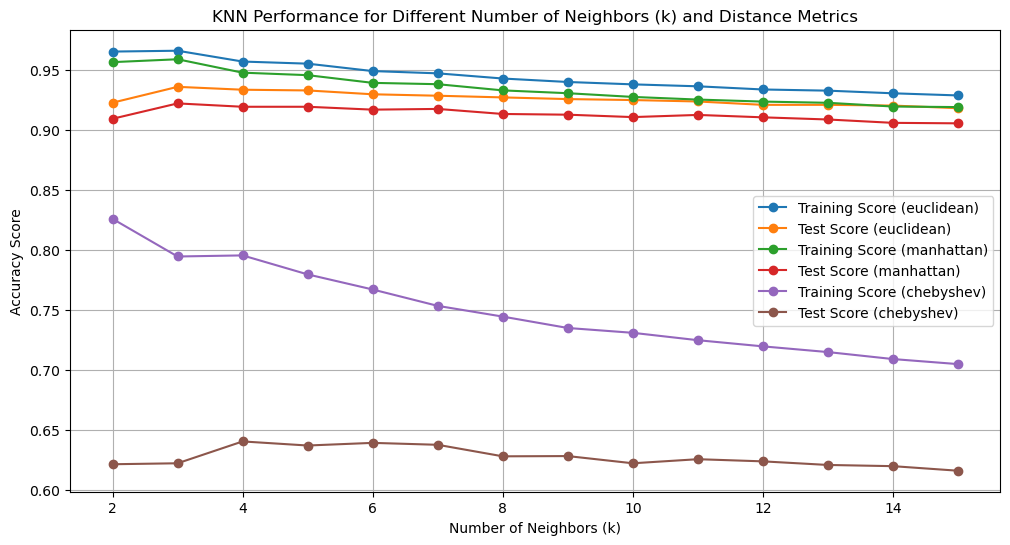

In [15]:
from sklearn.model_selection import KFold
from sklearn import neighbors
import numpy as np
import matplotlib.pyplot as plt

# Define the range of neighbors (k) and distance metrics
vec_nb_voisin = np.arange(2, 16)
distance_metrics = ['euclidean', 'manhattan', 'chebyshev']

# Create KFold instance
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Initialize arrays to store results for each distance metric
scores_test = np.zeros((len(distance_metrics), len(vec_nb_voisin)))
scores_train = np.zeros((len(distance_metrics), len(vec_nb_voisin)))

# Loop over different distance metrics
for j, distance_metric in enumerate(distance_metrics):
    # Loop over different values of n_neighbors (k)
    for i, nb_voisin in enumerate(vec_nb_voisin):
        # Initialize scores for each iteration of k-fold
        scores_test_kfold = []
        scores_train_kfold = []
        print("currently using",distance_metric,"metric with",nb_voisin,"neighbors")


        # Iterate through the folds
        for train_index, test_index in kf.split(x_reduced_ds, y_reduced_ds):
            X_train, X_test = x_reduced_ds[train_index], x_reduced_ds[test_index]
            y_train, y_test = y_reduced_ds[train_index], y_reduced_ds[test_index]

            # Create a k-nearest neighbors classifier with the current distance metric and n_neighbors
            knn = neighbors.KNeighborsClassifier(n_neighbors=nb_voisin, metric=distance_metric)

            # Train the model
            knn.fit(X_train, y_train)

            # Evaluate the model on the test set
            score_test = knn.score(X_test, y_test)
            scores_test_kfold.append(score_test)

            # Evaluate the model on the training set
            score_train = knn.score(X_train, y_train)
            scores_train_kfold.append(score_train)

        # Average scores over all folds
        scores_test[j, i] = np.mean(scores_test_kfold)
        scores_train[j, i] = np.mean(scores_train_kfold)

# Plot the results for each distance metric
plt.figure(figsize=(12, 6))

for j, distance_metric in enumerate(distance_metrics):
    plt.plot(vec_nb_voisin, scores_train[j, :], label=f'Training Score ({distance_metric})', marker='o')
    plt.plot(vec_nb_voisin, scores_test[j, :], label=f'Test Score ({distance_metric})', marker='o')

plt.title('KNN Performance for Different Number of Neighbors (k) and Distance Metrics')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy Score')
plt.legend()
plt.grid(True)
plt.show()

- Fixez n_job à 1 puis à -1 et calculez le temps de chacun.

n_neighbors=2, metric=euclidean, n_jobs=1: 7.8889 seconds
n_neighbors=3, metric=euclidean, n_jobs=1: 7.8641 seconds
n_neighbors=4, metric=euclidean, n_jobs=1: 9.1859 seconds
n_neighbors=5, metric=euclidean, n_jobs=1: 8.9047 seconds
n_neighbors=6, metric=euclidean, n_jobs=1: 9.1890 seconds
n_neighbors=7, metric=euclidean, n_jobs=1: 10.8034 seconds
n_neighbors=8, metric=euclidean, n_jobs=1: 9.1022 seconds
n_neighbors=9, metric=euclidean, n_jobs=1: 9.4220 seconds
n_neighbors=2, metric=manhattan, n_jobs=1: 125.5075 seconds
n_neighbors=3, metric=manhattan, n_jobs=1: 127.0120 seconds
n_neighbors=4, metric=manhattan, n_jobs=1: 127.4886 seconds
n_neighbors=5, metric=manhattan, n_jobs=1: 126.5131 seconds
n_neighbors=6, metric=manhattan, n_jobs=1: 127.6944 seconds
n_neighbors=7, metric=manhattan, n_jobs=1: 126.9986 seconds
n_neighbors=8, metric=manhattan, n_jobs=1: 126.0691 seconds
n_neighbors=9, metric=manhattan, n_jobs=1: 126.4959 seconds
n_neighbors=2, metric=chebyshev, n_jobs=1: 59.5352 seco

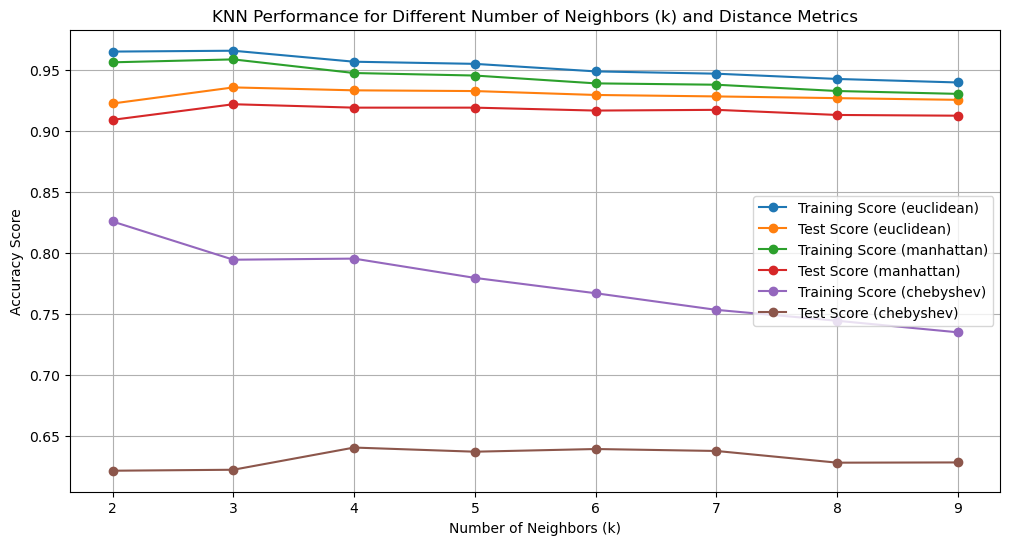

In [16]:
from sklearn.model_selection import KFold
from sklearn import neighbors
import numpy as np
import matplotlib.pyplot as plt
import time

# Define the range of neighbors (k) and distance metrics
vec_nb_voisin = np.arange(2, 16)
distance_metrics = ['euclidean', 'manhattan', 'chebyshev']

# Create KFold instance
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Initialize arrays to store results for each distance metric
scores_test = np.zeros((len(distance_metrics), len(vec_nb_voisin)))
scores_train = np.zeros((len(distance_metrics), len(vec_nb_voisin)))

# Loop over different distance metrics
for j, distance_metric in enumerate(distance_metrics):
    # Loop over different values of n_neighbors (k)
    for i, nb_voisin in enumerate(vec_nb_voisin):
        # Initialize scores for each iteration of k-fold
        scores_test_kfold = []
        scores_train_kfold = []
        start_time = time.time()

        # Iterate through the folds
        for train_index, test_index in kf.split(x_reduced_ds, y_reduced_ds):
            X_train, X_test = x_reduced_ds[train_index], x_reduced_ds[test_index]
            y_train, y_test = y_reduced_ds[train_index], y_reduced_ds[test_index]

            # Create a k-nearest neighbors classifier with the current distance metric and n_neighbors
            knn = neighbors.KNeighborsClassifier(n_neighbors=nb_voisin, metric=distance_metric, n_jobs=1)
            
            # Measure the time taken for fitting with n_jobs=1
            knn.fit(X_train, y_train)
            
            

            # Evaluate the model on the test set
            score_test = knn.score(X_test, y_test)
            scores_test_kfold.append(score_test)

            # Evaluate the model on the training set
            score_train = knn.score(X_train, y_train)
            scores_train_kfold.append(score_train)
            
        end_time = time.time()
        # Average scores over all folds
        scores_test[j, i] = np.mean(scores_test_kfold)
        scores_train[j, i] = np.mean(scores_train_kfold)

        elapsed_time = end_time - start_time
        print(f"n_neighbors={nb_voisin}, metric={distance_metric}, n_jobs=1: {elapsed_time:.4f} seconds")

# Repeat the process for n_jobs=-1
for j, distance_metric in enumerate(distance_metrics):
    for i, nb_voisin in enumerate(vec_nb_voisin):
        scores_test_kfold = []
        scores_train_kfold = []
        start_time = time.time()

        for train_index, test_index in kf.split(x_reduced_ds, y_reduced_ds):
            X_train, X_test = x_reduced_ds[train_index], x_reduced_ds[test_index]
            y_train, y_test = y_reduced_ds[train_index], y_reduced_ds[test_index]

            # Create a k-nearest neighbors classifier with the current distance metric and n_neighbors
            knn = neighbors.KNeighborsClassifier(n_neighbors=nb_voisin, metric=distance_metric, n_jobs=-1)
            
            # Measure the time taken for fitting with n_jobs=-1
            knn.fit(X_train, y_train)

            # Evaluate the model on the test set
            score_test = knn.score(X_test, y_test)
            scores_test_kfold.append(score_test)

            # Evaluate the model on the training set
            score_train = knn.score(X_train, y_train)
            scores_train_kfold.append(score_train)

        end_time = time.time()

        # Average scores over all folds
        scores_test[j, i] = np.mean(scores_test_kfold)
        scores_train[j, i] = np.mean(scores_train_kfold)
        
        elapsed_time = end_time - start_time

        print(f"n_neighbors={nb_voisin}, metric={distance_metric}, n_jobs=-1: {elapsed_time:.4f} seconds")

# Plot the results for each distance metric
plt.figure(figsize=(12, 6))

for j, distance_metric in enumerate(distance_metrics):
    plt.plot(vec_nb_voisin, scores_train[j, :], label=f'Training Score ({distance_metric})', marker='o')
    plt.plot(vec_nb_voisin, scores_test[j, :], label=f'Test Score ({distance_metric})', marker='o')

plt.title('KNN Performance for Different Number of Neighbors (k) and Distance Metrics')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy Score')
plt.legend()
plt.grid(True)
plt.show()


- In your opinion, what are the advantages and disadvantages of the k-NN method: optimality ? computation time ? scalability ?

very long computation time, not scalable, ez to understand, not optimal

# 3. The Support Vector Machines (SVM) method

The SVM is a method finding a linear separation between 2 classes of samples in an augmented space using kernel functions, while optimizing the margin between the 2 classes. This method can have a good performance on clasification problems.

The SVM method requires:
- a kernel (e.g. Gaussian)
- a training dataset

The SVM method is designed for binary classification and it is possible to perform multi-class classification by using several "one-vs-rest" binary classification. The Support Vector Classification method automatically perform this multi-class approach.

In the following example, we have 3 classes (ω1, ω2, ω3) and the goal is to find the value of the class for an unknown example x. We consider several Kernels

<img src="https://scikit-learn.org/stable/_images/sphx_glr_plot_iris_svc_001.png" alt="SVM" />

The results are highly dependent on the choice of this kernel.

### Information:
The algorithm SVC is implemented in a package called **sklearn.svm**: https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC.

In order for the SVM method to perform well, the data needs to be centered. This can be performed using the **StandardScaler** function in the package sklearn.preprocessing. The main commands are then:
- scaler = StandardScaler()
- X_train = scaler.fit_transform(X_train)
- X_test = scaler.transform(X_test)

Then to get the SVC classifier, here are the main commands:
- The line **clf = SVC(kernel='rbf', decision_function_shape='ovr')** creates an object of type classifier based on the Gaussian kernel,
- The instruction clf.fit(X, y) uses the data to define the classifier (training),
- The command **clf.predict()** is used to classify the new examples,
- The command **clf.score(xtest, ytest)** computes the global score of the classifier for a given dataset.

## Exercice 3: The SVC method

- Just like before: import the data and extract a data sample named X with a size of 5000 examples.

In [17]:
# Import necessary libraries
import numpy as np
from sklearn.datasets import fetch_openml

# Fetch the MNIST dataset from OpenML
mnist = fetch_openml('mnist_784', parser='auto')

# Convert data and target to NumPy arrays
X_complete = np.asarray(mnist.data)
y_complete = np.asarray(mnist.target)

# Choose a random sample of 5000 examples from the complete dataset
sample_chosen = np.random.randint(70000, size=5000)

# Extract a reduced dataset based on the chosen sample
x_reduced_ds = X_complete[sample_chosen]
y_reduced_ds = y_complete[sample_chosen]

- Inspired by the previous work on the k-NN: use K-fold validation in order to decide which kernel gives the best results for our classification problem using an SVC classifier. Do not forget to scale the data.

Kernel: linear, Average Accuracy: 0.9138
Kernel: poly, Average Accuracy: 0.8446
Kernel: rbf, Average Accuracy: 0.9252
Kernel: sigmoid, Average Accuracy: 0.907


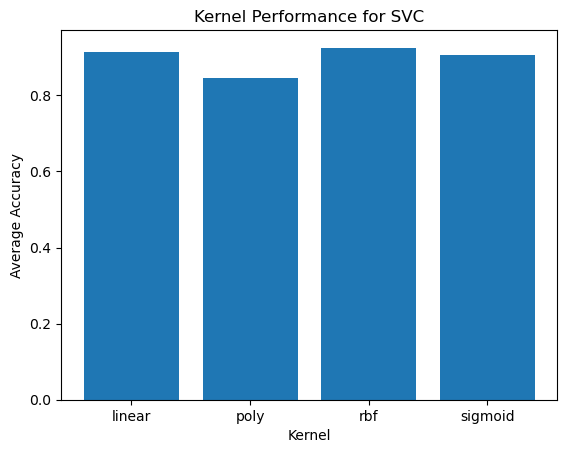

In [18]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.model_selection import cross_val_score, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

# Load the MNIST dataset
mnist = fetch_openml('mnist_784', parser='auto')

# Convert data and target to NumPy arrays
X_complete = np.asarray(mnist.data)
y_complete = np.asarray(mnist.target)

# Choose a random subset of the dataset
sample_chosen = np.random.randint(70000, size=5000)

# Extract a reduced dataset based on the chosen sample
x_reduced_ds = X_complete[sample_chosen]
y_reduced_ds = y_complete[sample_chosen]

# Scale the data using StandardScaler
scaler = StandardScaler()
x_reduced_ds_scaled = scaler.fit_transform(x_reduced_ds)

# Set up K-fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Try different kernels and evaluate their performance
kernel_options = ['linear', 'poly', 'rbf', 'sigmoid']

for kernel in kernel_options:
    # Create a Support Vector Machine (SVM) classifier with the specified kernel
    svc = SVC(kernel=kernel)

    # Perform cross-validation and obtain accuracy scores
    scores = cross_val_score(svc, x_reduced_ds_scaled, y_reduced_ds, cv=kf)

    # Display the results
    print(f"Kernel: {kernel}, Average Accuracy: {np.mean(scores)}")

# Plot the results
plt.bar(kernel_options, [np.mean(cross_val_score(SVC(kernel=k), x_reduced_ds_scaled, y_reduced_ds, cv=kf)) for k in kernel_options])
plt.title('Kernel Performance for SVC')
plt.xlabel('Kernel')
plt.ylabel('Average Accuracy')
plt.show()


- In your opinion, what are the advantages and disadvantages of the SVM method: optimality ? computation time ? scalability ?

### Complementary definitions from the medical domain:
We define:
- TP (true positives) represents the number of ill individuals with a positive test,
- FP (faux positives) represents the number of healthy individuals with a positive test,
- TP (true negatives) represents the number of ill individuals with a negative test,
- FP (faux negatives) represents the number of healthy individuals with a negative test.

Two measures allow to judge the quality of a classifier:
1. **Sensitivity** (or *true positive rate, recall, probability of detection*): probability that the test is positive when the illness is present = proportion of positives correctly identified = TP/(TP+FN).
2. **Specificity** (or *true negative rate*): probability that the test is negative when the patient is healthy = proportion of negatives correctly identified = TN/(VP+FN).